Removal and Detection using Z-score


In [38]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as  plt


In [39]:
df = pd.read_csv('placement.csv')

In [40]:
df.head()

,city,cgpa,iq,placement
0,Chicago,2.13,345.0,0
1,New York,6.80,123.0,1
2,Los Angeles,5.90,106.0,0
3,Chicago,NaN,121.0,0
4,New York,7.40,132.0,1


C:\Users\Gagan\AppData\Local\Temp\ipykernel_8500\185295917.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['cgpa'])
C:\Users\Gagan\AppData\Local\Temp\ipykernel_8500\185295917.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['placement'])


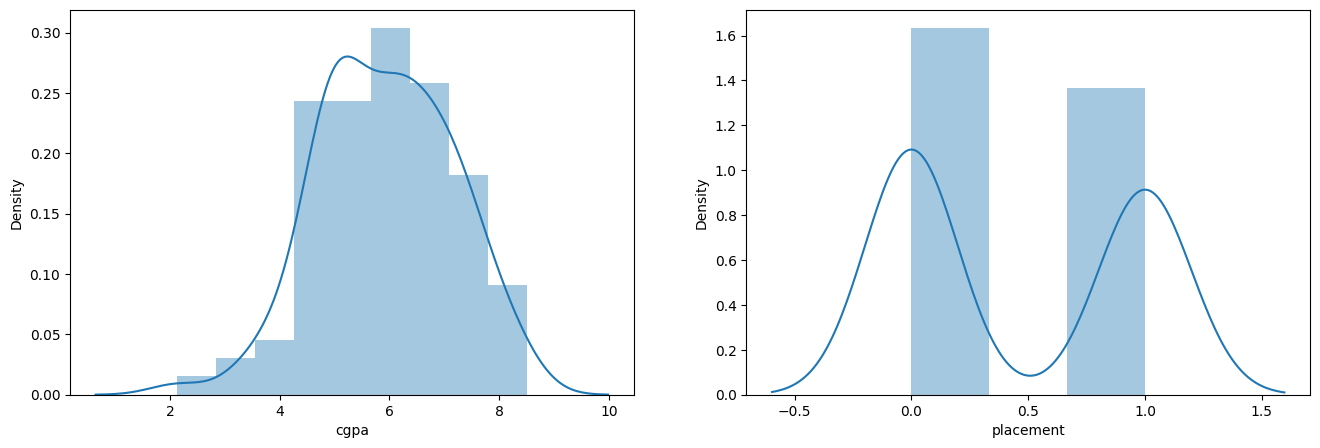

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(df['cgpa'])

plt.subplot(1,2,2)
sb.distplot(df['placement'])


plt.show()


In [42]:
print(df['cgpa'].describe())

count    93.000000
mean      5.923978
std       1.224920
min       2.130000
25%       5.000000
50%       6.000000
75%       6.800000
max       8.500000
Name: cgpa, dtype: float64


In [43]:
print("Highest value : ",df['cgpa'].mean() +  3*df['cgpa'].std())
print("Lowest value : ",df['cgpa'].mean() -  3*df['cgpa'].std())

Highest value :  9.598737953792234
Lowest value :  2.2492190354550767


In [49]:
# Finding Outliers
newdf = df[(df['cgpa'] >9.45) | (df['cgpa'] < 2.47)]

In [48]:
newdf

,city,cgpa,iq,placement
0,Chicago,2.13,345.0,0


In [50]:
df['zscorecgpa'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [51]:
df.head()

,city,cgpa,iq,placement,zscorecgpa
0,Chicago,2.13,345.0,0,-3.097328
1,New York,6.80,123.0,1,0.715166
2,Los Angeles,5.90,106.0,0,-0.019576
3,Chicago,NaN,121.0,0,NaN
4,New York,7.40,132.0,1,1.204994


In [54]:
# Capping
upplimit = df['cgpa'].mean() + 3*df['cgpa'].std()
lowerlimit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [56]:
df['cgpa'] = np.where(df['cgpa']>upplimit,upplimit,np.where(df['cgpa']<lowerlimit,lowerlimit,df['cgpa']))

In [57]:
df.head()

,city,cgpa,iq,placement,zscorecgpa
0,Chicago,2.249219,345.0,0,-3.097328
1,New York,6.800000,123.0,1,0.715166
2,Los Angeles,5.900000,106.0,0,-0.019576
3,Chicago,NaN,121.0,0,NaN
4,New York,7.400000,132.0,1,1.204994
